In [29]:
import pandas as pd
import numpy as np
import math
import csv

from difflib import get_close_matches 

from matplotlib import pyplot as plt

In [2]:
#Open Significant K-Mer files
summarydata = []

with open('jaccard_k25_kmeans_c2_significant_kmers.csv', newline="\n") as f:
    reader5 = csv.reader(f)
    data5 = list(reader5)
    summarydata.append(data5)
    
with open('jaccard_k25_kmeans_c4_significant_kmers.csv', newline="\n") as f:
    reader5 = csv.reader(f)
    data6 = list(reader5)
    summarydata.append(data6)
    
with open('jaccard_k25_kmeans_c5_significant_kmers.csv', newline="\n") as f:
    reader5 = csv.reader(f)
    data7 = list(reader5)
    summarydata.append(data7)

In [3]:
'''
filez = open('merdumps.fa')
readds = filez.read()
splitmer = readds.splitlines(True)
allkmers = []

for i in range(0, len(splitmer)):
    if i % 2 !=0:
        allkmers.append(splitmer[:-1])

'''

"\nfilez = open('merdumps.fa')\nreadds = filez.read()\nsplitmer = readds.splitlines(True)\nallkmers = []\n\nfor i in range(0, len(splitmer)):\n    if i % 2 !=0:\n        allkmers.append(splitmer[:-1])\n\n"

# Reference Genome Stuff

In [4]:
refsque = open("refdumps.fa")
reffs = refsque.read()
splitreffs = reffs.splitlines(True)

#Get List of All Canonical K-Mer counts of Reference Genome
finalrefks = []
for i in range(0, len(splitreffs)):
    if i%2 !=0:
        kk = splitreffs[i]
        finalrefks.append(kk[:-1])

In [5]:
epplrefgenome = open("EPI_ISL_402124.fasta")
refgenome = epplrefgenome.read()
blar = refgenome.splitlines(True)
finalref = []

for what in range(0, len(blar)):
    if what !=0:
        ek = blar[what]
        finalref.append(ek[:-1])
        
kr = ""
reffgenome = kr.join(finalref)

#Return Dict with location of each canonical count k-mer - key = kmer, value = nucleotide location
locatrefmers = {}
for i in finalrefks:
    if reffgenome.find(i) != -1:
        locatrefmers.update({i:reffgenome.find(i)})

# Pairing Refernce Genome K-Mers with Proteins

In [119]:
proteins = open("NC_045512_annotate.bed")
pread = proteins.read()
protienz = pread.splitlines(True)

#Make a dictionary with key = name of protein, value = list with start/end nucleotides of protein encoding region
protiensequences = {}
for i in protienz:
    stuff = i.split("\t")
    proname = stuff[4]
    start = stuff[1]
    end = stuff[2]
    #print(start)
    #print(end)
    #print(proname, start, end)
    #print("")
    if "join" not in start:
        protiensequences.update({proname[:-1]:[int(start),int(end)]})

In [120]:
protiensequences['leader protein']

[266, 805]

# Pairing Reference Genome with Mutated K-Mers

In [181]:
#Universal Functions

#Gets unique k-mers of each cluster NOT in reference genome
def uniquemutkmers(dataa):
    mutatedkmers = []
    for group in dataa:
        itskmers = []
        for kmer in group:
            if kmer not in list(locatrefmers.keys()):
                itskmers.append(kmer)
        mutatedkmers.append(itskmers)
    return mutatedkmers

#Pairs mutated (NOT in ref genome) kmer to reference genome's k-mers 
#Note: Get_close matches usually returns > 1 match between k-mers - this is something I'm still trying to work on
#As of now, I'm only saving the k-mers that have the same starting nucleotide, but this is probably not the most accurate
def returnclosestrefmers(uniquemutkmers):
    totalpairs = []
    for group in uniquemutkmers:
        refmerspair = {}
        for thin in group:
            ble = get_close_matches(thin, list(locatrefmers.keys())) 
            firstend = []
            for y in ble:
                if y[0] == thin[0]:
                    firstend.append(y)
            if len(firstend) !=0:
                refmerspair.update({thin:firstend})
        totalpairs.append(refmerspair)
    return totalpairs

def locatemutations(returnmers):
    output = []
    for group in returnmers:
        groupoutcomes = {}
        for kmer in group:
            eep = group[kmer]
            locs = []
            for ee in eep:
                locs.append(locatrefmers[ee])
            groupoutcomes.update({kmer:locs})
        output.append(groupoutcomes)
    return output
            
def associateprotein(locmuts):
    output = []
    proties = list(protiensequences.keys())
    loccs = list(protiensequences.values())
    for group in locmuts:
        groupoutcomes = {}
        for kmerr in group:
            locations = group[kmerr]
            bles = []
            for thing in locations:
                blarg = thing
                for stuff in loccs:
                    if blarg in range(stuff[0], stuff[1]) or blarg+25 in range(stuff[0], stuff[1]):
                        print((stuff[0]))
                        print(stuff[1])
                        print(blarg)
                        print(blarg+25)
                        print("")
                        bles.append(proties[loccs.index(stuff)])
                        print(bles)
            if len(bles) >0:
                groupoutcomes.update({kmerr:bles})
        output.append(groupoutcomes)
    return output

In [9]:
#Testing Above functions on Data 3 (Jaccard, C2) unique k-mers
esk = uniquemutkmers(data6)

In [ ]:
pairtest = returnclosestrefmers(esk)

In [91]:
pairtest

[{'CTATGTGTTCATCAAACGTTCGGAA': ['CCTATGTGTTCATCAAACGTTCGGA',
   'CCCTATGTGTTCATCAAACGTTCGG'],
  'GTTTTTACTACTAATTATTTGCCTA': ['GTTTTTACTATTAAGTGTTTGCCTA',
   'GTTGTTACTCACAATTTTGACTTCA',
   'GTGTTTGTACTAATTATATGCCTTA'],
  'TGCAAATATACGGATTAACAGACAA': ['TAAATATAAGGGTATTAAAATACAA',
   'TTGCACCTAATATGATGGTAACAAA',
   'TGTAATAGGAATTGTCAACAACACA'],
  'CGACGACTACTAGCGTTCCTTTGTA': ['CGACGACTACTAGCGTGCCTTTGTA'],
  'TTATTGAAAAGTAGATCTTCAATAA': ['TATTAGAAAAGTGTGACCTTCAAAA'],
  'CGCGCTACTGCAACGATACCTATAC': ['CGCGCTACTGCAACGATACCGATAC',
   'CGCTACTGCAACGATACCGATACAA'],
  'AAGGAACAATACATATGTGAAGCCA': ['ATGGAACCAATTTATGATGAACCGA',
   'AATGGAACCAATTTATGATGAACCG'],
  'TCAACTTGAAGAAGAGCAAGAAGAA': ['TCAACCTGAAGAAGAGCAAGAAGAA'],
  'AGCTTCCGAACGTTTGATGAACACA': ['AGGTTCCGAAGGTCTTAATGACAAC',
   'AAGGTTCCGAAGGTCTTAATGACAA'],
  'ATAGATGCTTACCCACTTACTAAAT': ['ATAGATGCTTACCCACTTACTAAAC'],
  'AATGACATAAGGAATAGCAAAGTAT': ['AATACTAGATGGAATTTCACAGTAT'],
  'AAGGAATAGCAAAGTATTAAAGGCA': ['AGGATTGATAAAGTACTTAATGAGA'],


In [ ]:
step3 = locatemutations(pairtest)

In [ ]:
step3

In [182]:
associateprotein(step3)

266
805
464
489

['leader protein']
266
13483
464
489

['leader protein', 'ORF1a polyprotein']
266
805
463
488

['leader protein', 'ORF1a polyprotein', 'leader protein']
266
13483
463
488

['leader protein', 'ORF1a polyprotein', 'leader protein', 'ORF1a polyprotein']
2720
8554
6960
6985

['nsp3']
266
13483
6960
6985

['nsp3', 'ORF1a polyprotein']
10973
11842
11010
11035

['nsp3', 'ORF1a polyprotein', 'nsp6']
266
13483
11010
11035

['nsp3', 'ORF1a polyprotein', 'nsp6', 'ORF1a polyprotein']
2720
8554
6752
6777

['nsp3', 'ORF1a polyprotein', 'nsp6', 'ORF1a polyprotein', 'nsp3']
266
13483
6752
6777

['nsp3', 'ORF1a polyprotein', 'nsp6', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein']
2720
8554
4476
4501

['nsp3']
266
13483
4476
4501

['nsp3', 'ORF1a polyprotein']
806
2719
2669
2694

['nsp3', 'ORF1a polyprotein', 'nsp2']
266
13483
2669
2694

['nsp3', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein']
21563
25384
24945
24970

['nsp3', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein', 'surfa

266
13483
868
893

['nsp2', 'ORF1a polyprotein']
806
2719
869
894

['nsp2', 'ORF1a polyprotein', 'nsp2']
266
13483
869
894

['nsp2', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein']
806
2719
870
895

['nsp2', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein', 'nsp2']
266
13483
870
895

['nsp2', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein']
27394
27759
27632
27657

['ORF7a protein']
266
805
414
439

['leader protein']
266
13483
414
439

['leader protein', 'ORF1a polyprotein']
2720
8554
8543
8568

['leader protein', 'ORF1a polyprotein', 'nsp3']
8555
10054
8543
8568

['leader protein', 'ORF1a polyprotein', 'nsp3', 'nsp4']
266
13483
8543
8568

['leader protein', 'ORF1a polyprotein', 'nsp3', 'nsp4', 'ORF1a polyprotein']
21563
25384
21939
21964

['leader protein', 'ORF1a polyprotein', 'nsp3', 'nsp4', 'ORF1a polyprotein', 'surface glycoprotein']
8555
10054
9161
9186

['nsp4']
266
13483
9161
9186

['nsp4', 'ORF1a polyprotein']
8555
10054
9160
9185

['nsp4', 'OR

266
13483
4478
4503

['nsp2', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein']
806
2719
2478
2503

['nsp2']
266
13483
2478
2503

['nsp2', 'ORF1a polyprotein']
806
2719
2477
2502

['nsp2', 'ORF1a polyprotein', 'nsp2']
266
13483
2477
2502

['nsp2', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein']
27394
27759
27467
27492

['ORF7a protein']
8555
10054
8638
8663

['nsp4']
266
13483
8638
8663

['nsp4', 'ORF1a polyprotein']
8555
10054
8639
8664

['nsp4', 'ORF1a polyprotein', 'nsp4']
266
13483
8639
8664

['nsp4', 'ORF1a polyprotein', 'nsp4', 'ORF1a polyprotein']
2720
8554
5750
5775

['nsp3']
266
13483
5750
5775

['nsp3', 'ORF1a polyprotein']
10973
11842
10996
11021

['nsp3', 'ORF1a polyprotein', 'nsp6']
266
13483
10996
11021

['nsp3', 'ORF1a polyprotein', 'nsp6', 'ORF1a polyprotein']
2720
8554
5749
5774

['nsp3', 'ORF1a polyprotein', 'nsp6', 'ORF1a polyprotein', 'nsp3']
266
13483
5749
5774

['nsp3', 'ORF1a polyprotein', 'nsp6', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein']
29558
29674
29

28274
29533
28865
28890

['nucleocapsid phosphoprotein']
28274
29533
28867
28892

['nucleocapsid phosphoprotein', 'nucleocapsid phosphoprotein']
28274
29533
28868
28893

['nucleocapsid phosphoprotein', 'nucleocapsid phosphoprotein', 'nucleocapsid phosphoprotein']
27202
27387
27285
27310

['ORF6 protein']
16237
18039
17845
17870

['helicase']
2720
8554
6760
6785

['nsp3']
266
13483
6760
6785

['nsp3', 'ORF1a polyprotein']
2720
8554
6969
6994

['nsp3', 'ORF1a polyprotein', 'nsp3']
266
13483
6969
6994

['nsp3', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein']
19621
20658
20288
20313

['endoRNAse']
18040
19620
18488
18513

['endoRNAse', "3'-to-5' exonuclease"]
21563
25384
24440
24465

['endoRNAse', "3'-to-5' exonuclease", 'surface glycoprotein']
10973
11842
11392
11417

['nsp6']
266
13483
11392
11417

['nsp6', 'ORF1a polyprotein']
2720
8554
3158
3183

['nsp3']
266
13483
3158
3183

['nsp3', 'ORF1a polyprotein']
2720
8554
3903
3928

['nsp3']
266
13483
3903
3928

['nsp3', 'ORF1a polyprotein'

['nsp3']
266
13483
2801
2826

['nsp3', 'ORF1a polyprotein']
8555
10054
8680
8705

['nsp3', 'ORF1a polyprotein', 'nsp4']
266
13483
8680
8705

['nsp3', 'ORF1a polyprotein', 'nsp4', 'ORF1a polyprotein']
16237
18039
17776
17801

['helicase']
16237
18039
17775
17800

['helicase', 'helicase']
18040
19620
18924
18949

["3'-to-5' exonuclease"]
25393
26220
25916
25941

['ORF3a protein']
8555
10054
9070
9095

['nsp4']
266
13483
9070
9095

['nsp4', 'ORF1a polyprotein']
20659
21552
21492
21517

["2'-O-ribose methyltransferase"]
2720
8554
6504
6529

["2'-O-ribose methyltransferase", 'nsp3']
266
13483
6504
6529

["2'-O-ribose methyltransferase", 'nsp3', 'ORF1a polyprotein']
10973
11842
11386
11411

['nsp6']
266
13483
11386
11411

['nsp6', 'ORF1a polyprotein']
10973
11842
11388
11413

['nsp6', 'ORF1a polyprotein', 'nsp6']
266
13483
11388
11413

['nsp6', 'ORF1a polyprotein', 'nsp6', 'ORF1a polyprotein']
2720
8554
6492
6517

['nsp3']
266
13483
6492
6517

['nsp3', 'ORF1a polyprotein']
20659
21552
21444



['ORF3a protein']
266
805
296
321

['leader protein']
266
13483
296
321

['leader protein', 'ORF1a polyprotein']
266
805
297
322

['leader protein', 'ORF1a polyprotein', 'leader protein']
266
13483
297
322

['leader protein', 'ORF1a polyprotein', 'leader protein', 'ORF1a polyprotein']
266
805
295
320

['leader protein', 'ORF1a polyprotein', 'leader protein', 'ORF1a polyprotein', 'leader protein']
266
13483
295
320

['leader protein', 'ORF1a polyprotein', 'leader protein', 'ORF1a polyprotein', 'leader protein', 'ORF1a polyprotein']
2720
8554
6383
6408

['nsp3']
266
13483
6383
6408

['nsp3', 'ORF1a polyprotein']
20659
21552
21126
21151

["2'-O-ribose methyltransferase"]
28274
29533
29429
29454

["2'-O-ribose methyltransferase", 'nucleocapsid phosphoprotein']
2720
8554
5746
5771

['nsp3']
266
13483
5746
5771

['nsp3', 'ORF1a polyprotein']
26523
27191
26535
26560

['nsp3', 'ORF1a polyprotein', 'membrane glycoprotein']
266
805
308
333

['leader protein']
266
13483
308
333

['leader protein

17724
17749

['helicase', 'helicase']
28274
29533
28834
28859

['nucleocapsid phosphoprotein']
28274
29533
28840
28865

['nucleocapsid phosphoprotein']
16237
18039
17836
17861

['helicase']
16237
18039
17857
17882

['helicase']
18040
19620
19373
19398

["3'-to-5' exonuclease"]
16237
18039
17418
17443

["3'-to-5' exonuclease", 'helicase']
2720
8554
4399
4424

['nsp3']
266
13483
4399
4424

['nsp3', 'ORF1a polyprotein']
8555
10054
8631
8656

['nsp4']
266
13483
8631
8656

['nsp4', 'ORF1a polyprotein']
16237
18039
16580
16605

['nsp4', 'ORF1a polyprotein', 'helicase']
16237
18039
16580
16605

['helicase']
16237
18039
17853
17878

['helicase']
29558
29674
29615
29640

['ORF10 protein']
2720
8554
7903
7928

['nsp3']
266
13483
7903
7928

['nsp3', 'ORF1a polyprotein']
21563
25384
22159
22184

['nsp3', 'ORF1a polyprotein', 'surface glycoprotein']
16237
18039
17672
17697

['nsp3', 'ORF1a polyprotein', 'surface glycoprotein', 'helicase']
2720
8554
3369
3394

['nsp3']
266
13483
3369
3394

['nsp3', 


['nsp2', 'ORF1a polyprotein']
2720
8554
6517
6542

['nsp2', 'ORF1a polyprotein', 'nsp3']
266
13483
6517
6542

['nsp2', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein']
2720
8554
4101
4126

['nsp3']
266
13483
4101
4126

['nsp3', 'ORF1a polyprotein']
2720
8554
4102
4127

['nsp3', 'ORF1a polyprotein', 'nsp3']
266
13483
4102
4127

['nsp3', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein']
2720
8554
4103
4128

['nsp3', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein', 'nsp3']
266
13483
4103
4128

['nsp3', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein', 'nsp3', 'ORF1a polyprotein']
11843
12091
11894
11919

['nsp7']
266
13483
11894
11919

['nsp7', 'ORF1a polyprotein']
11843
12091
11895
11920

['nsp7', 'ORF1a polyprotein', 'nsp7']
266
13483
11895
11920

['nsp7', 'ORF1a polyprotein', 'nsp7', 'ORF1a polyprotein']
10973
11842
11779
11804

['nsp6']
266
13483
11779
11804

['nsp6', 'ORF1a polyprotein']
2720
8554
5308
5333

['nsp6', 'ORF1a polyprotein', 'nsp3']
266
13483
5308
5333

['nsp6', 'ORF1

[{'CTATGTGTTCATCAAACGTTCGGAA': ['leader protein',
   'ORF1a polyprotein',
   'leader protein',
   'ORF1a polyprotein'],
  'GTTTTTACTACTAATTATTTGCCTA': ['nsp3',
   'ORF1a polyprotein',
   'nsp6',
   'ORF1a polyprotein',
   'nsp3',
   'ORF1a polyprotein'],
  'TGCAAATATACGGATTAACAGACAA': ['nsp3',
   'ORF1a polyprotein',
   'nsp2',
   'ORF1a polyprotein',
   'surface glycoprotein'],
  'CGACGACTACTAGCGTTCCTTTGTA': ['ORF3a protein'],
  'TTATTGAAAAGTAGATCTTCAATAA': ["2'-O-ribose methyltransferase"],
  'CGCGCTACTGCAACGATACCTATAC': ['ORF3a protein', 'ORF3a protein'],
  'AAGGAACAATACATATGTGAAGCCA': ['ORF3a protein', 'ORF3a protein'],
  'TCAACTTGAAGAAGAGCAAGAAGAA': ['nsp3', 'ORF1a polyprotein'],
  'AGCTTCCGAACGTTTGATGAACACA': ['nsp2',
   'ORF1a polyprotein',
   'nsp2',
   'ORF1a polyprotein'],
  'AATGACATAAGGAATAGCAAAGTAT': ['nsp2', 'ORF1a polyprotein'],
  'AAGGAATAGCAAAGTATTAAAGGCA': ['nsp3', 'ORF1a polyprotein'],
  'TCTGCAAGTGTCACTTTATTGAAAA': ['nsp3', 'ORF1a polyprotein'],
  'AATCATAAAAGGATTAT

In [32]:
finalprotez

[{'CTATGTGTTCATCAAACGTTCGGAA': ['leader protein',
   'ORF1a polyprotein',
   'leader protein',
   'ORF1a polyprotein'],
  'GTTTTTACTACTAATTATTTGCCTA': ['nsp3',
   'ORF1a polyprotein',
   'nsp6',
   'ORF1a polyprotein',
   'nsp3',
   'ORF1a polyprotein'],
  'TGCAAATATACGGATTAACAGACAA': ['nsp3',
   'ORF1a polyprotein',
   'nsp2',
   'ORF1a polyprotein',
   'surface glycoprotein'],
  'CGACGACTACTAGCGTTCCTTTGTA': ['ORF3a protein'],
  'TTATTGAAAAGTAGATCTTCAATAA': ["2'-O-ribose methyltransferase"],
  'CGCGCTACTGCAACGATACCTATAC': ['ORF3a protein', 'ORF3a protein'],
  'AAGGAACAATACATATGTGAAGCCA': ['ORF3a protein', 'ORF3a protein'],
  'TCAACTTGAAGAAGAGCAAGAAGAA': ['nsp3', 'ORF1a polyprotein'],
  'AGCTTCCGAACGTTTGATGAACACA': ['nsp2',
   'ORF1a polyprotein',
   'nsp2',
   'ORF1a polyprotein'],
  'ATAGATGCTTACCCACTTACTAAAT': [],
  'AATGACATAAGGAATAGCAAAGTAT': ['nsp2', 'ORF1a polyprotein'],
  'AAGGAATAGCAAAGTATTAAAGGCA': ['nsp3', 'ORF1a polyprotein'],
  'ACAGGGTGATGATTATGTGTACCTG': [],
  'TCTGCAAGT

In [ ]:
csv_file = "jaccard_k25_kmeans_c4_significantprotein.csv"

In [48]:
with open(csv_file, "w") as f:
    writer = csv.writer(f)
    for i in range(0, 4):
        urr = finalprotez[i]
        writer.writerow((urr.keys()))
        writer.writerow((urr.values()))

In [49]:
with open('jaccard_k25_kmeans_c4_significantprotein.csv', newline="\n") as f:
    reader5 = csv.reader(f)
    data8 = list(reader5)
    #summarydata.append(data7)

# Actually Running Code?

In [ ]:
mer_counts_k25_df = pd.read_csv("~/Downloads/canonical25mers.csv", index_col="File Name")

In [ ]:
mer_counts_k25_df = mer_counts_k25_df.drop("Unnamed: 0", axis=1)

In [ ]:
mer_counts_k25_df.head()

In [ ]:
with open('jaccard_k25_kmeans_c2.csv', newline='\n') as f:
    reader1 = csv.reader(f)
    jac25c2 = list(reader1)
    
with open("jaccard_k25_kmeans_c4.csv", newline="\n") as f:
    reader2 = csv.reader(f)
    jac25c4 = list(reader2)

In [ ]:
allkmers = list(mer_counts_k25_df.columns)
mutkmers = []

for i in allkmers:
    if i not in list(locatrefmers.keys()):
        mutkmers.append(i)

In [ ]:
#Jaccard K-Mer Counts 4 Clusters 

jac4gg1 = mer_counts_k25_df.loc[jac25c4[0]]
jac4gg2 = mer_counts_k25_df.loc[jac25c4[1]]
jac4g3 = mer_counts_k25_df.loc[jac25c4[2]]
jac4g4 = mer_counts_k25_df.loc[jac25c4[3]]

In [129]:
print(len(jac4g2))

1555


In [ ]:
#Jaccard K-Mer Counts 2 Clusters

jac4g1 = mer_counts_k25_df.loc[jac25c2[0]]
jac4g2 = mer_counts_k25_df.loc[jac25c2[1]]

In [130]:
def mutkmercounts(sepdf, protienout, i):
    totcounts = {}
    for kmer in list(sepdf.columns):
        if kmer not in list(locatrefmers.keys()) and kmer in list(protienout[i].keys()):
            kmercount = sepdf[kmer].sum()
            if kmercount !=0:
                totcounts.update({kmer:kmercount})
    return totcounts
            
def findproteinwithmaxmutationspergroup(mutkmerouts, protienout, i):
    investigate = protienout[i]
    yup = max(list(mutkmerouts.values()))
    hoho = "ji"
    for b in mutkmerouts:
        if mutkmerouts[b] == yup:
            hoho = b
    investigate = protienout[i]
    if hoho in list(investigate.keys()):
    #print(type(investigate))
    print(hoho)
    return investigate[hoho]

In [122]:
print(len(jac4gg1))

559


In [282]:
eere = finalprotez[1]
stuff = []
are = 0
for e in eere:
    if len(stuff) == 0:
        stuff.append(e)
    if are > 1:
        #print(j42counts[stuff[0]])
        e = stuff[0]
        if (j42counts[e]) > j42counts[stuff[0]]:
            stuff[0] = e
    are+=1

In [283]:
print(stuff)

['TCCATAGCCAATTCTAAGAAATCAA']


In [31]:
j21counts = mutkmercounts(jac4g1)
j22counts = mutkmercounts(jac4g2)

In [84]:
j41counts = mutkmercounts(jac4gg1, finalprotez, 0)
j42counts = mutkmercounts(jac4gg2, finalprotez, 1)
j43counts = mutkmercounts(jac4g3, finalprotez, 2)
j44counts = mutkmercounts(jac4g4, finalprotez, 3)

In [288]:
j42counts['TCCATAGCCAATTCTAAGAAATCAA']

132

In [289]:
findproteinwithmaxmutationspergroup(j42counts, finalprotez, 1)

ATCATCAGCACATCTAGGTTTTGTC


[]

In [229]:
eep = finalprotez[0]
print(eep["CCAAAAGAAGTTATCTTCTTAGAGG"])

['nsp2', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein', 'nsp2', 'ORF1a polyprotein']


In [321]:
blerr = pairtest[2]
errr = finalprotez[2]
print(blerr['GCTGAAAATGTAACAGGACTTTTTA'])
#print(blerr["ACTCAGAGTAGAATCATTATCTAAA"])

['GCTGAAAATGTAACAGGACTCTTTA']


In [320]:
print(locatrefmers['AACTCAGAGTAGAATCATCATCTAA'])


11897


In [292]:
print(reffgenome[221:221+25])

CATCAGCACATCTAGGTTTCGTCCG


In [297]:
xs = []
ys = []
tesz = pairtest[1]
for thing in tesz:
    counts = j42counts[thing]
    mo = tesz[thing]
    first = mo[0]
    if counts == 132 and first == "TCCACTGAGAAGTCTAACATAATAA":
        print(locatrefmers[first])
    xs.append(locatrefmers[first])
    ys.append(counts)

21841


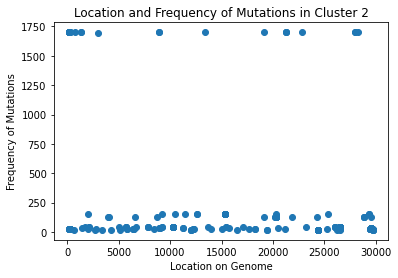

In [261]:
plt.scatter(xs, ys)
plt.title("Location and Frequency of Mutations in Cluster 2")
plt.xlabel("Location on Genome")
plt.ylabel("Frequency of Mutations")
plt.show()

In [262]:
mx = []
my = []
for y in ys:
    if y == max(ys):
        my.append(y)
        mx.append(xs[ys.index(y)])

In [299]:
print(len(reffgenome))

29891


In [325]:
ea = (reffgenome[18040:18064])
ee = "CTGAAAATGTAACAGGACTTTTTA"
for thing in range(0, len(ee)):
    if ee[thing] != ea[thing]:
        print(thing)
print(ea)
print(ee)

GCTGAAAATGTAACAGGACTTTTTA

19
CTGAAAATGTAACAGGACTCTTTA
CTGAAAATGTAACAGGACTTTTTA


In [326]:
n = 3

chunks = [ea[i:i+n] for i in range(0, len(ew), n)]
print(chunks)

chunk2s = [ee[i:i+n] for i in range(0, len(eq), n)]
print(chunk2s)

['CTG', 'AAA', 'ATG', 'TAA', 'CAG', 'GAC', 'TCT', 'TTA']
['CTG', 'AAA', 'ATG', 'TAA', 'CAG', 'GAC', 'TTT', 'TTA']


In [308]:
for a in range(0, len(chunks)):
    if chunks[a] != chunk2s[a]:
        print(a)
        print(chunks[a])
        print(chunk2s[a])
        print("")

0
CAA
CCA

1
AAG
AAA

2
AAG
GAA

3
TTA
ATT

4
TCT
ATC

5
TCT
TTC

6
TAG
TTA

7
AGG
GAG



In [263]:
protiensequences

{'leader protein': [266, 805],
 'nsp2': [806, 2719],
 'nsp3': [2720, 8554],
 'nsp4': [8555, 10054],
 '3C-like proteinase': [10055, 10972],
 'nsp6': [10973, 11842],
 'nsp7': [11843, 12091],
 'nsp8': [12092, 12685],
 'nsp9': [12686, 13024],
 'nsp10': [13025, 13441],
 'helicase': [16237, 18039],
 "3'-to-5' exonuclease": [18040, 19620],
 'endoRNAse': [19621, 20658],
 "2'-O-ribose methyltransferase": [20659, 21552],
 'ORF1a polyprotein': [266, 13483],
 'nsp11': [13442, 13480],
 'surface glycoprotein': [21563, 25384],
 'ORF3a protein': [25393, 26220],
 'envelope protein': [26245, 26472],
 'membrane glycoprotein': [26523, 27191],
 'ORF6 protein': [27202, 27387],
 'ORF7a protein': [27394, 27759],
 'ORF7b': [27756, 27887],
 'ORF8 protein': [27894, 28259],
 'nucleocapsid phosphoprotein': [28274, 29533],
 'ORF10 protein': [29558, 29674]}

In [328]:
print(18039/3)

6013.0


In [ ]:
21841
3896
12537